In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import cv2
import numpy as np
from fcmeans import FCM
from google.colab.patches import cv2_imshow

In [ ]:
def NormalizeData(data):
  return (data - np.min(data)) / np.max(data)

In [ ]:
#get RGB values of the image
img = cv2.imread("/content/ref_image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img)
scaled_img = NormalizeData(img)
scaled_img

In [ ]:
depth_array = np.loadtxt('/content/depth_array.txt')

In [ ]:
#Make a 3D array X of the 6 features (x coordinate, y coordinate, depth value, rgb value) of each pixel
# make a list using 2 nested for loop and then make a 3D array from the list
empty_list = []
for i in range(480):
  for j in range(640):
    scaled_i = i/480
    scaled_j = j/640
    empty_list.append([scaled_i,scaled_j,scaled_img[i,j,0],scaled_img[i,j,1],scaled_img[i,j,2],depth_array[i][j]])
empty_list

In [ ]:
X = np.array(empty_list)
print (X)

[[0.         0.         0.55294118 0.41568627 0.35686275 0.546     ]
 [0.         0.0015625  0.55686275 0.41960784 0.36078431 0.547     ]
 [0.         0.003125   0.56078431 0.41568627 0.35294118 0.548     ]
 ...
 [0.99791667 0.9953125  0.25882353 0.36078431 0.54509804 0.563     ]
 [0.99791667 0.996875   0.25490196 0.35686275 0.54117647 0.563     ]
 [0.99791667 0.9984375  0.25490196 0.35686275 0.54117647 0.563     ]]


In [ ]:
#Fuzzy C-Means clustering with python
my_model = FCM(n_clusters=5) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features

centers = my_model.centers
labels = my_model.predict(X)
print(centers)
print(labels)

[[0.53468683 0.48860599 0.73035033 0.73674528 0.72277429 0.43202629]
 [0.72165761 0.36015633 0.42277039 0.37986662 0.39490799 0.47623607]
 [0.353763   0.63687894 0.50428312 0.51060005 0.40627612 0.45561178]
 [0.56814125 0.72546295 0.26527566 0.2950448  0.28493939 0.4940245 ]
 [0.25241077 0.21365847 0.23239788 0.3301214  0.43476136 0.51633094]]
[4 4 4 ... 3 3 3]


In [ ]:
# Generating variable Y for visualisation
empty_list = []
for i in range(480):
  for j in range(640):
    scaled_i = i/480
    scaled_j = j/640
    empty_list.append([scaled_i,scaled_j,scaled_img[i,j,0],scaled_img[i,j,1],scaled_img[i,j,2],depth_array[i][j]])

Y = np.array(empty_list)
print (Y)

[[0.         0.         0.55294118 0.41568627 0.35686275 0.546     ]
 [0.         0.0015625  0.55686275 0.41960784 0.36078431 0.547     ]
 [0.         0.003125   0.56078431 0.41568627 0.35294118 0.548     ]
 ...
 [0.99791667 0.9953125  0.25882353 0.36078431 0.54509804 0.563     ]
 [0.99791667 0.996875   0.25490196 0.35686275 0.54117647 0.563     ]
 [0.99791667 0.9984375  0.25490196 0.35686275 0.54117647 0.563     ]]


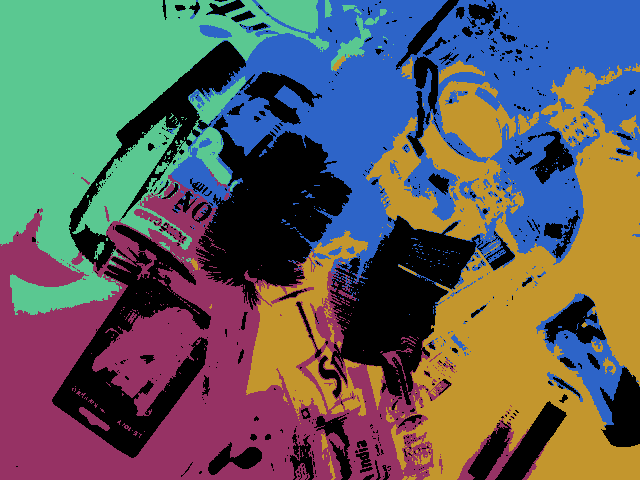

In [ ]:
clustter_img = cv2.imread("/content/ref_image.png")
for k in range(Y.shape[0]):
            green_part = int((labels[k]*50)%255)
            blue_part = int((labels[k]*100)%255)
            red_part = int((labels[k]*150)%255)
            cv2.circle(clustter_img, (int(Y[k][1]*640), int(Y[k][0]*480)), 2, (blue_part,green_part,red_part), -1)
cv2_imshow(clustter_img)